Importing basic Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import collections
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo
sns.set(style="darkgrid")
sns.set(font_scale=1.3)

import wordcloud
from wordcloud import WordCloud, STOPWORDS 

C:\ProgramData\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\ProgramData\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


Considering the Cleaned Data So no pre processing wilbe required

In [ ]:
df_tweets = pd.read_csv("Processed Data - Moderna.csv")

In [ ]:
df_tweets.head(5)

Unnamed: 0  Unnamed: 0.1                   Id            Timestamp  \
0           0             0  1441380110020616192  2021-09-24 12:32:52   
1           1             1  1441380046522966018  2021-09-24 12:32:37   
2           2             2  1441380034741112841  2021-09-24 12:32:34   
3           3             3  1441380034518740992  2021-09-24 12:32:34   
4           4             4  1441380002667270148  2021-09-24 12:32:26   

               Source  Retwwet_Count                  User_Name  \
0      SocialPilot.co              0           somersethealthmd   
1  Twitter for iPhone              0        Michael Majchrowicz   
2  Twitter for iPhone              0           Stephani Shelton   
3  Twitter for iPhone              0  💎 Breakfast at Tiffanys 💎   
4     Twitter Web App              0           Emil T Jonsson ⚡   

                                              tweets  text_length  
0  ' time  rollupyoursleeves covid    vaccine  sw...           66  
1    miaminewtimes  begin human trial   experimen...           38  
2   debjshaw anyone compromised immunity   able  ...           32  
3   fashionwasted babyyyyyyy   vaccinate okay fai...           10  
4    news  adobe  lock life time subscription model            12

In [ ]:
import nltk
#nltk.download('book')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

In [ ]:
df_tweets["tweets"] = df_tweets['tweets'].str.replace(r'\b\w{15,3000}\b', r' ')

In [ ]:
df_tweets["tweets"] = df_tweets['tweets'].str.replace('deliver', '')
df_tweets["tweets"] = df_tweets['tweets'].str.replace('https', '')
df_tweets["tweets"] = df_tweets['tweets'].str.replace('corona', '')
df_tweets["tweets"] = df_tweets['tweets'].str.replace('covid', '')
df_tweets["tweets"] = df_tweets['tweets'].str.replace('total', '')
df_tweets["tweets"] = df_tweets['tweets'].str.replace('like', '')
df_tweets["tweets"] = df_tweets['tweets'].str.replace('moderna', '')
df_tweets["tweets"] = df_tweets['tweets'].str.replace('make', '')
df_tweets["tweets"] = df_tweets['tweets'].str.replace('pfizer', '')
df_tweets["tweets"] = df_tweets['tweets'].str.replace('would', '')
df_tweets["tweets"] = df_tweets['tweets'].str.replace('take', '')
df_tweets["tweets"] = df_tweets['tweets'].str.replace('first', '')
df_tweets["tweets"] = df_tweets['tweets'].str.replace('second', '')
df_tweets["tweets"] = df_tweets['tweets'].str.replace('know', '')
df_tweets["tweets"] = df_tweets['tweets'].str.replace('people', '')
df_tweets["tweets"] = df_tweets['tweets'].str.replace('data', '')
df_tweets["tweets"] = df_tweets['tweets'].str.replace('wait', '')
df_tweets["tweets"] = df_tweets['tweets'].str.replace('johnson', '')
df_tweets["tweets"] = df_tweets['tweets'].str.replace('what', '')
df_tweets["tweets"] = df_tweets['tweets'].str.replace('year', '')
df_tweets["tweets"] = df_tweets['tweets'].str.replace('mrna', '')
df_tweets["tweets"] = df_tweets['tweets'].str.replace('even', '')
df_tweets["tweets"] = df_tweets['tweets'].str.replace('month', '')
df_tweets["tweets"] = df_tweets['tweets'].str.replace('this', '')
df_tweets["tweets"] = df_tweets['tweets'].str.replace('astrazeneca', '')
df_tweets["tweets"] = df_tweets['tweets'].str.replace('also', '')
df_tweets["tweets"] = df_tweets['tweets'].str.replace('week', '')
df_tweets["tweets"] = df_tweets['tweets'].str.replace('still', '')

In [ ]:
from collections import Counter
cnt = Counter()
for text in df_tweets['tweets'].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(20)

[('skeptical', 396),
 ('annoyed', 395),
 ('undecided', 395),
 ('uneasy', 395),
 ('hesitant', 395),
 ('booster', 170),
 ('vaccine', 165),
 ("'", 138),
 ('shot', 118),
 ('dose', 90),
 ('pandemic', 47),
 ('need', 44),
 ('good', 38),
 ('receive', 37),
 ('think', 36),
 ('vaccinate', 34),
 ('time', 33),
 ('could', 32),
 ('give', 30),
 ('available', 29)]

In [ ]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(20)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

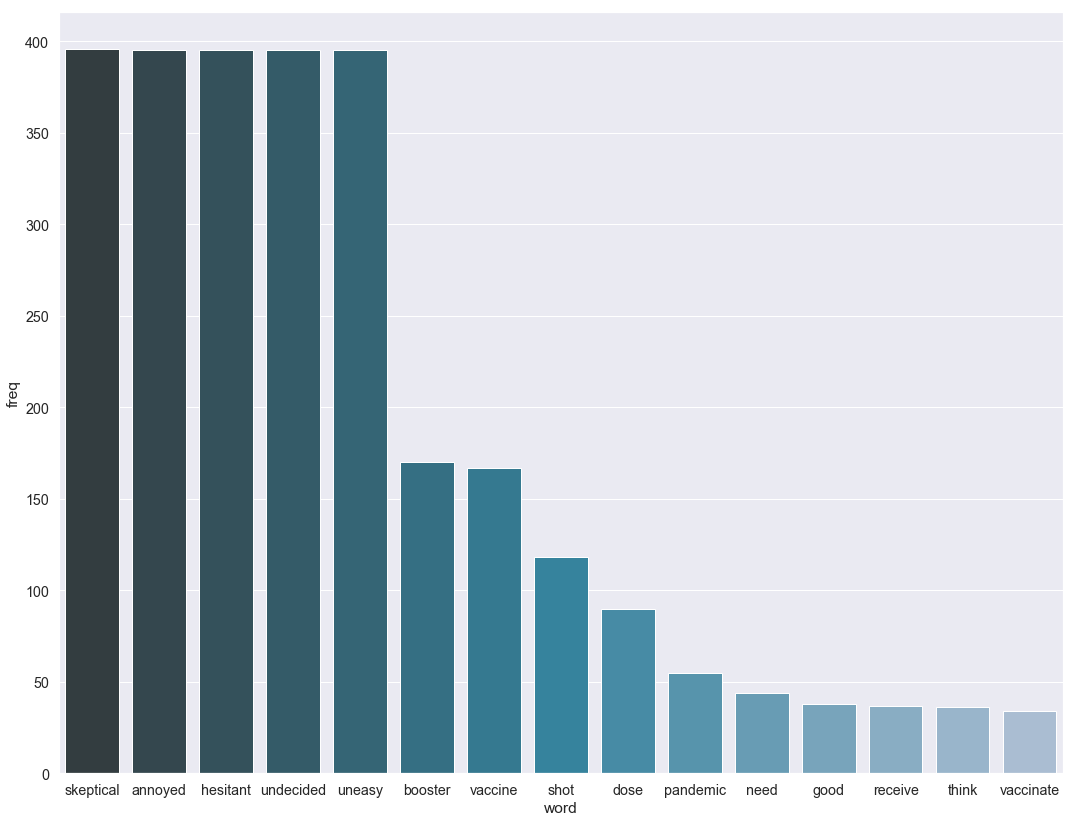

In [ ]:
sr_clean= df_tweets['tweets']
cv = CountVectorizer()
bow = cv.fit_transform(sr_clean)
word_freq = dict(zip(cv.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)

word_counter_df = pd.DataFrame(word_counter.most_common(15), columns = ['word', 'freq'])
fig, ax = plt.subplots(figsize=(18, 14))
sns.barplot(x="word", y="freq", data=word_counter_df, palette="PuBuGn_d", ax=ax)
plt.show();

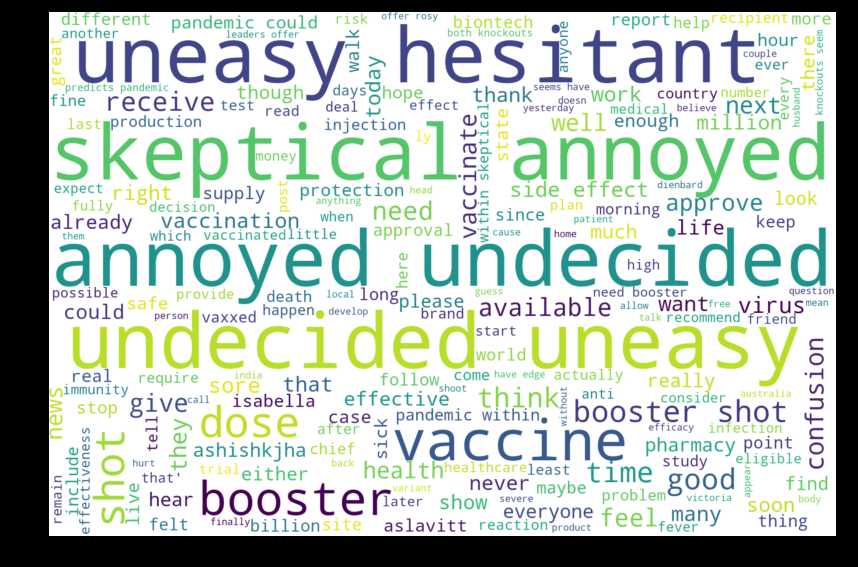

In [ ]:
# Word Cloud

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words_1(text):
    pos_tagged_text = nltk.pos_tag(text)
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) 
    for word, pos in pos_tagged_text])

stopwords = lemmatize_words_1(df_tweets['tweets'])

comment_words = ' '

for val in df_tweets['tweets']: 
    val = str(val) 
    tokens = val.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
      comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 1800, height = 1200, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
                      
plt.figure(figsize = (12, 12), facecolor = 'Black') 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off') 
plt.tight_layout(pad = 1) 
  
plt.show() 

In [ ]:
from nltk import bigrams
# Create list of lists containing bigrams in tweets
key_words = [text.lower().split() for text in df_tweets.tweets]
terms_bigram = [list(bigrams(text)) for text in key_words]
terms_bigram[0]

[("'", 'time'),
 ('time', 'vaccine'),
 ('vaccine', 'swing'),
 ('swing', 'somerset'),
 ('somerset', 'center'),
 ('center', 'today'),
 ('today', 'happy'),
 ('happy', 'face'),
 ('face', 'smiley'),
 ('smiley', 'happy'),
 ('happy', 'face'),
 ('face', 'smiley'),
 ('smiley', 'offer'),
 ('offer', 'person'),
 ('person', 'over'),
 ('over', 'register'),
 ('register', 'call'),
 ('call', 'walk'),
 ('walk', 'welcome'),
 ('welcome', 'skeptical'),
 ('skeptical', 'annoyed'),
 ('annoyed', 'undecided'),
 ('undecided', 'uneasy'),
 ('uneasy', 'hesitant'),
 ('hesitant', 'gcmfw')]

In [ ]:
df_tweets['Sentiment_Scores'] = df_tweets['tweets'].apply(lambda x:sia.polarity_scores(x)['compound'])

In [ ]:
df_tweets.head(5)

Unnamed: 0  Unnamed: 0.1                   Id            Timestamp  \
0           0             0  1441380110020616192  2021-09-24 12:32:52   
1           1             1  1441380046522966018  2021-09-24 12:32:37   
2           2             2  1441380034741112841  2021-09-24 12:32:34   
3           3             3  1441380034518740992  2021-09-24 12:32:34   
4           4             4  1441380002667270148  2021-09-24 12:32:26   

               Source  Retwwet_Count                  User_Name  \
0      SocialPilot.co              0           somersethealthmd   
1  Twitter for iPhone              0        Michael Majchrowicz   
2  Twitter for iPhone              0           Stephani Shelton   
3  Twitter for iPhone              0  💎 Breakfast at Tiffanys 💎   
4     Twitter Web App              0           Emil T Jonsson ⚡   

                                              tweets  text_length  \
0  ' time        vaccine  swing somerset  center ...           66   
1    miaminewtimes  begin human trial   experimen...           38   
2   debjshaw anyone compromised immunity   able  ...           32   
3   fashionwasted babyyyyyyy   vaccinate okay fai...           10   
4    news  adobe  lock life time subscription model            12   

   Sentiment_Scores  
0            0.7506  
1           -0.8316  
2            0.6808  
3            0.5719  
4            0.0000

In [ ]:
df_tweets['Sentiment'] = df_tweets['Sentiment_Scores'].apply(lambda s : 
                                                             'Positive' if s > 0 else ('Negative' if s < 0 else 'Neutral'))

In [ ]:
df_tweets.head(10)

Unnamed: 0  Unnamed: 0.1                   Id            Timestamp  \
0           0             0  1441380110020616192  2021-09-24 12:32:52   
1           1             1  1441380046522966018  2021-09-24 12:32:37   
2           2             2  1441380034741112841  2021-09-24 12:32:34   
3           3             3  1441380034518740992  2021-09-24 12:32:34   
4           4             4  1441380002667270148  2021-09-24 12:32:26   
5           5             5  1441379984547794945  2021-09-24 12:32:22   
6           6             6  1441379937068355584  2021-09-24 12:32:11   
7           7             7  1441379899361542144  2021-09-24 12:32:02   
8           8             8  1441379780209700870  2021-09-24 12:31:33   
9           9             9  1441379708701007876  2021-09-24 12:31:16   

                Source  Retwwet_Count                     User_Name  \
0       SocialPilot.co              0              somersethealthmd   
1   Twitter for iPhone              0           Michael Majchrowicz   
2   Twitter for iPhone              0              Stephani Shelton   
3   Twitter for iPhone              0     💎 Breakfast at Tiffanys 💎   
4      Twitter Web App              0              Emil T Jonsson ⚡   
5   Twitter for iPhone              0             Amanda Hugginkiss   
6  Twitter for Android              0                 Ernest Barath   
7   Twitter for iPhone              0  Suleiman Alfred Massarweh MD   
8      Twitter Web App              0              Robbie Bernstein   
9   Twitter for iPhone              0             Daniel Summers MD   

                                              tweets  text_length  \
0  ' time        vaccine  swing somerset  center ...           66   
1    miaminewtimes  begin human trial   experimen...           38   
2   debjshaw anyone compromised immunity   able  ...           32   
3   fashionwasted babyyyyyyy   vaccinate okay fai...           10   
4    news  adobe  lock life time subscription model            12   
5   darjok   actually  anti inflammatory  impact ...           19   
6     heard sister' boyfriend     strong side eff...           32   
7   cmichaelgibson good incomplete  many   vaccin...           13   
8  here' stumper   need booster safe    booster  ...           33   
9   acweyand   available       come contact  many...           26   

   Sentiment_Scores Sentiment  
0            0.7506  Positive  
1           -0.8316  Negative  
2            0.6808  Positive  
3            0.5719  Positive  
4            0.0000   Neutral  
5           -0.5574  Negative  
6            0.8591  Positive  
7            0.5859  Positive  
8            0.8176  Positive  
9            0.0000   Neutral

In [ ]:
df_tweets.Sentiment.value_counts()

Negative    477
Positive    234
Neutral     158
Name: Sentiment, dtype: int64

<BarContainer object of 3 artists>

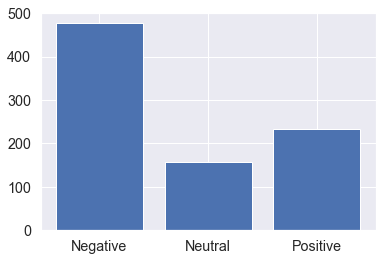

In [ ]:
array = np.array(df_tweets.Sentiment)
unique, counts = np.unique(array, return_counts=True)
np.column_stack((unique, counts)) 
plt.bar(unique, counts)

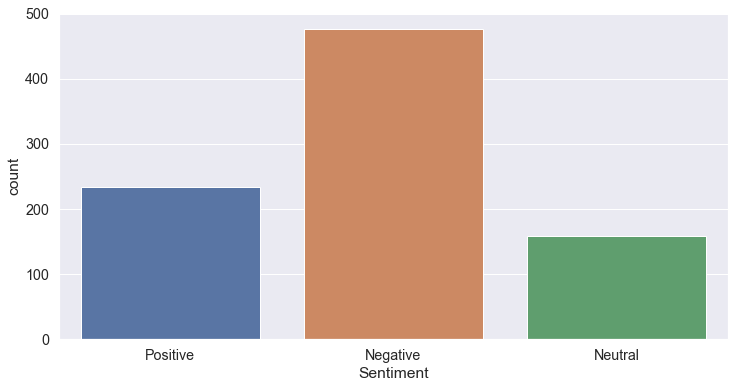

In [ ]:
temp = df_tweets.groupby('Sentiment').count()['tweets'].reset_index().sort_values(by='tweets',ascending=False)
temp.style.background_gradient(cmap='Purples')

plt.figure(figsize=(12,6))
sns.countplot(x='Sentiment',data=df_tweets)
fig = go.Figure(go.Funnelarea(
    text =temp.Sentiment,
    values = temp.tweets,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

In [ ]:
#plt.bar(df_tweets.Sentiment.unique(),df_tweets.Sentiment.value_counts())

In [ ]:
df_tweets["tweets_2"] = df_tweets['tweets'].str.replace('refund', '')

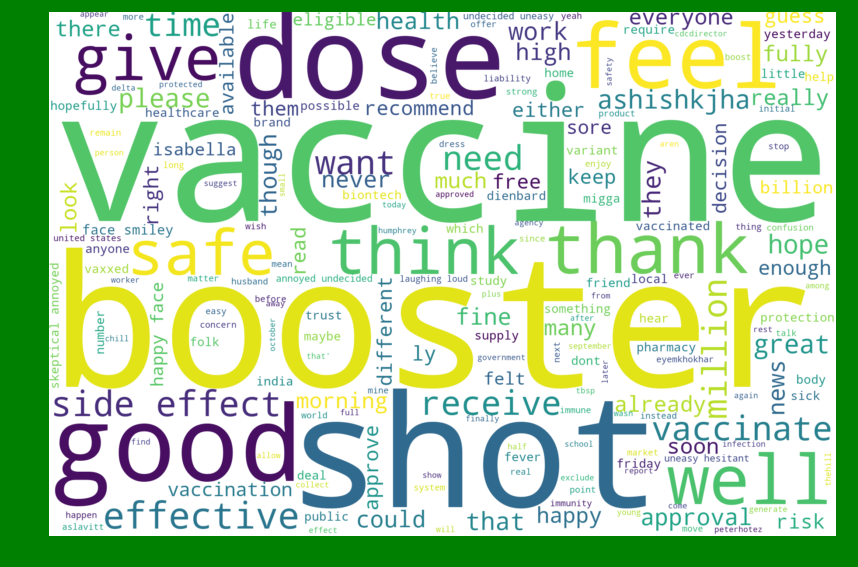

In [ ]:
# Word Cloud for POSITIVE Words

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words_1(text):
    pos_tagged_text = nltk.pos_tag(text)
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) 
    for word, pos in pos_tagged_text])

pos_data = df_tweets[df_tweets['Sentiment'] =='Positive']
stopwords = lemmatize_words_1(df_tweets['tweets_2'])

comment_words = ' '

for val in pos_data['tweets_2']: 
    val = str(val) 
    tokens = val.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
      comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 1800, height = 1200, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
                      
plt.figure(figsize = (12, 12), facecolor = 'Green') 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off') 
plt.tight_layout(pad = 1) 
  
plt.show() 

In [ ]:
df_tweets["tweets_1"] = df_tweets['tweets'].str.replace('delivery', '')

In [ ]:
df_tweets["tweets_1"] = df_tweets['tweets_1'].str.replace('shall', '')

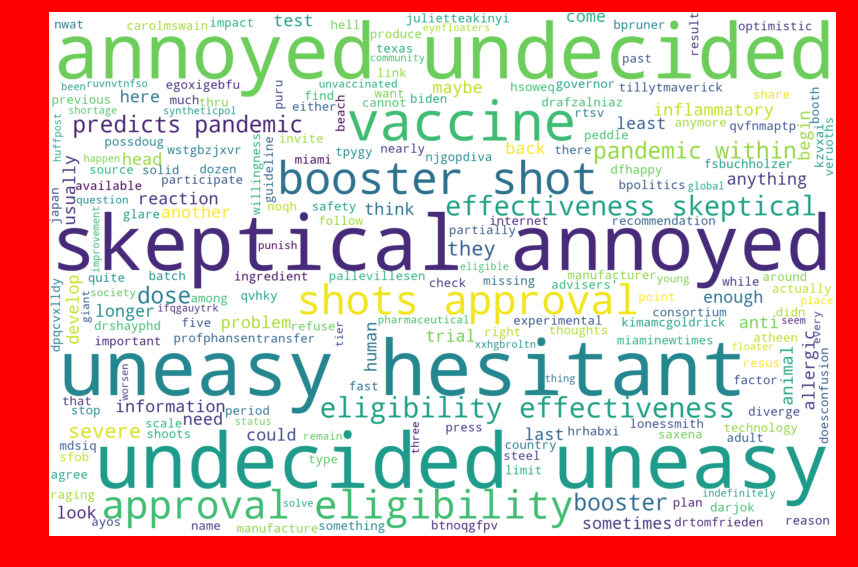

In [ ]:
# Word Cloud for NEGATIVE Words

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words_1(text):
    pos_tagged_text = nltk.pos_tag(text)
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) 
    for word, pos in pos_tagged_text])

neg_data = df_tweets[df_tweets['Sentiment'] =='Negative']
stopwords = lemmatize_words_1(df_tweets['tweets_1'])

comment_words = ' '

for val in neg_data['tweets_1'][:30]: 
    val = str(val) 
    tokens = val.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
      comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 1800, height = 1200, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
                      
plt.figure(figsize = (12, 12), facecolor = 'Red') 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off') 
plt.tight_layout(pad = 1) 
  
plt.show() 

**************************  End ****************************